# Import Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Load the data


In [3]:
data = pd.read_excel('data.xlsx')
data.head(10)

,Platform,business_id,city,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,...,ZIP Code,Business_ID_other,Rural_metropolitan_Desc,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
0,Platform 1,1770720401,Santa Barbara,CA,93101,5.0,7,F,108,1997.0,...,931032109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Platform 1,1699268318,Clearwater,FL,33755,5.0,10,F,108,2017.0,...,337631726,1.699268e+09,Metropolitan area core: primary flow within an...,971.0,138.0,813.0,20.0,762.0,NaN,31.0
2,Platform 1,1336331669,Bala Cynwyd,PA,19004,4.0,13,M,108,1986.0,...,190043207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Platform 1,1528008463,Plymouth Meeting,PA,19462,2.5,8,M,138,1980.0,...,194621718,1.528008e+09,Metropolitan area core: primary flow within an...,1988.0,NaN,1674.0,NaN,65.0,NaN,274.0
4,Platform 1,1366867269,Voorhees,NJ,8043,3.5,17,F,116,2014.0,...,80434509,1.366867e+09,Metropolitan area core: primary flow within an...,847.0,73.0,774.0,0.0,75.0,50.0,NaN
5,Platform 1,1689735383,Tarpon Springs,FL,34689,2.0,29,M,170,1988.0,...,346893790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Platform 1,1356471593,Tampa,FL,33607,3.0,36,M,116,1992.0,...,805162422,1.356472e+09,Metropolitan area core: primary flow within an...,869.0,103.0,766.0,0.0,106.0,33.0,25.0
7,Platform 1,1023598968,Brownsburg,IN,46112,1.5,14,M,108,2018.0,...,461121031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Platform 1,1316037153,Tucson,AZ,85718,2.5,43,M,3,1992.0,...,104672401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Platform 1,1902048259,Saint Petersburg,FL,33713,1.5,6,M,201,2009.0,...,337051300,1.902048e+09,Metropolitan area core: primary flow within an...,24.0,11.0,13.0,0.0,0.0,0.0,0.0


# Handle missing values


In [4]:
print("Missing values summary:")
print(data.isnull().sum())

Missing values summary:
Platform                       0
business_id                    0
city                           0
state                          0
postal_code                    1
score                          0
review_count                   0
Gender                         0
CEO_sch_cat                    0
CEO_grd_yr                     8
field_cat                      0
ZIP Code                       0
Business_ID_other           4919
Rural_metropolitan_Desc     4920
Tot_Clms_Services           4919
Brnd_Tot_Clms_Services      7510
Gnrc_Tot_Clms_Services      4986
Othr_Tot_Clms_Services      7521
LIS_Tot_Clms_Services       5898
Opioid_Tot_Clms_Services    6454
Antbtc_Tot_Clms_Services    6787
dtype: int64


In [8]:
data.columns

Index(['Platform', 'business_id', 'city', 'state', 'postal_code', 'score',
       'review_count', 'Gender', 'CEO_sch_cat', 'CEO_grd_yr', 'field_cat',
       'ZIP Code', 'Business_ID_other', 'Rural_metropolitan_Desc',
       'Tot_Clms_Services', 'Brnd_Tot_Clms_Services', 'Gnrc_Tot_Clms_Services',
       'Othr_Tot_Clms_Services', 'LIS_Tot_Clms_Services',
       'Opioid_Tot_Clms_Services', 'Antbtc_Tot_Clms_Services'],
      dtype='object')

# Get unique states from the 'state' column


In [11]:
unique_states = data['state'].unique()

unique_states

array(['CA', 'FL', 'PA', 'NJ', 'IN', 'AZ', 'NV', 'IL', 'MO', 'LA', 'TN',
       'AB', 'ID', 'DE', 'HI'], dtype=object)

# Extract the 'state' column and count unique values


In [12]:
state_counts = data['state'].value_counts()

state_counts

PA    2548
FL    2166
AZ     892
TN     843
NV     732
IN     684
MO     682
NJ     557
LA     535
CA     498
ID     329
AB     172
DE     128
IL     124
HI       1
Name: state, dtype: int64

# Filter the dataset based on a specific subset (e.g., state)


In [20]:
data = data.drop(['Platform',  'business_id', 'city', 'Rural_metropolitan_Desc'], axis=1)

In [21]:
state_subset = data[data['state'] == 'AZ']
state_subset

,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,field_cat,ZIP Code,Business_ID_other,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
8,AZ,85718,2.5,43,M,3,1992.0,33,104672401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AZ,85715,2.0,15,M,1,2020.0,19,757012036,1.265070e+09,66.0,NaN,63.0,NaN,20.0,NaN,21.0
48,AZ,85705,3.5,14,M,108,2014.0,59,857112602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,AZ,85748,2.0,25,F,204,2008.0,17,54011473,1.558528e+09,621.0,22.0,599.0,0.0,114.0,0.0,37.0
69,AZ,85715,4.5,7,M,155,2012.0,33,857136204,1.548505e+09,736.0,93.0,643.0,0.0,189.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,AZ,85614,2.0,54,M,222,1978.0,11,856140551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10862,AZ,85704,3.5,11,M,108,2014.0,59,857112602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10878,AZ,85755,4.5,6,F,108,2018.0,45,857046987,1.588133e+09,131.0,NaN,128.0,NaN,35.0,0.0,74.0
10880,AZ,85704,4.5,6,M,177,1997.0,51,404758179,1.174588e+09,209.0,0.0,209.0,0.0,79.0,51.0,NaN


# Calculate mean, median, and mode for each column


In [23]:
means = data.mean()
medians = data.median()
modes = data.mode().iloc[0]  # Get the first row of the mode DataFrame

# Fill missing values using mean, median, and mode
filled_data_mean = data.fillna(means)
filled_data_median = data.fillna(medians)
filled_data_mode = data.fillna(modes)

# Check if there are still any missing values after filling
print("Missing values after filling with mean:")
print(filled_data_mean.isnull().sum())
filled_data_mean

Missing values after filling with mean:
state                       0
postal_code                 1
score                       0
review_count                0
Gender                      0
CEO_sch_cat                 0
CEO_grd_yr                  0
field_cat                   0
ZIP Code                    0
Business_ID_other           0
Tot_Clms_Services           0
Brnd_Tot_Clms_Services      0
Gnrc_Tot_Clms_Services      0
Othr_Tot_Clms_Services      0
LIS_Tot_Clms_Services       0
Opioid_Tot_Clms_Services    0
Antbtc_Tot_Clms_Services    0
dtype: int64


C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_12108\2151265224.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = data.mean()
C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_12108\2151265224.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = data.median()


,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,field_cat,ZIP Code,Business_ID_other,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
0,CA,93101,5.0,7,F,108,1997.0,13,931032109,1.498723e+09,1385.228567,313.112689,1162.889077,16.085757,637.495293,73.534145,72.947125
1,FL,33755,5.0,10,F,108,2017.0,21,337631726,1.699268e+09,971.000000,138.000000,813.000000,20.000000,762.000000,73.534145,31.000000
2,PA,19004,4.0,13,M,108,1986.0,12,190043207,1.498723e+09,1385.228567,313.112689,1162.889077,16.085757,637.495293,73.534145,72.947125
3,PA,19462,2.5,8,M,138,1980.0,75,194621718,1.528008e+09,1988.000000,313.112689,1674.000000,16.085757,65.000000,73.534145,274.000000
4,NJ,8043,3.5,17,F,116,2014.0,69,80434509,1.366867e+09,847.000000,73.000000,774.000000,0.000000,75.000000,50.000000,72.947125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10886,CA,93101,4.5,15,F,128,1997.0,49,931018417,1.518938e+09,141.000000,81.000000,60.000000,0.000000,637.495293,0.000000,72.947125
10887,MO,63043,2.5,7,F,108,2018.0,59,630432208,1.649837e+09,297.000000,18.000000,279.000000,0.000000,84.000000,0.000000,121.000000
10888,NV,89503,3.5,20,F,108,2015.0,13,895025000,1.498723e+09,1385.228567,313.112689,1162.889077,16.085757,637.495293,73.534145,72.947125
10889,MO,63131,4.5,7,M,126,2004.0,5,631171811,1.437123e+09,2723.000000,313.112689,1785.000000,16.085757,646.000000,73.534145,23.000000


In [24]:
print("\nMissing values after filling with median:")
print(filled_data_median.isnull().sum())
filled_data_median


Missing values after filling with median:
state                       0
postal_code                 1
score                       0
review_count                0
Gender                      0
CEO_sch_cat                 0
CEO_grd_yr                  0
field_cat                   0
ZIP Code                    0
Business_ID_other           0
Tot_Clms_Services           0
Brnd_Tot_Clms_Services      0
Gnrc_Tot_Clms_Services      0
Othr_Tot_Clms_Services      0
LIS_Tot_Clms_Services       0
Opioid_Tot_Clms_Services    0
Antbtc_Tot_Clms_Services    0
dtype: int64


,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,field_cat,ZIP Code,Business_ID_other,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
0,CA,93101,5.0,7,F,108,1997.0,13,931032109,1.497780e+09,337.0,79.0,268.0,0.0,120.0,14.0,38.0
1,FL,33755,5.0,10,F,108,2017.0,21,337631726,1.699268e+09,971.0,138.0,813.0,20.0,762.0,14.0,31.0
2,PA,19004,4.0,13,M,108,1986.0,12,190043207,1.497780e+09,337.0,79.0,268.0,0.0,120.0,14.0,38.0
3,PA,19462,2.5,8,M,138,1980.0,75,194621718,1.528008e+09,1988.0,79.0,1674.0,0.0,65.0,14.0,274.0
4,NJ,8043,3.5,17,F,116,2014.0,69,80434509,1.366867e+09,847.0,73.0,774.0,0.0,75.0,50.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10886,CA,93101,4.5,15,F,128,1997.0,49,931018417,1.518938e+09,141.0,81.0,60.0,0.0,120.0,0.0,38.0
10887,MO,63043,2.5,7,F,108,2018.0,59,630432208,1.649837e+09,297.0,18.0,279.0,0.0,84.0,0.0,121.0
10888,NV,89503,3.5,20,F,108,2015.0,13,895025000,1.497780e+09,337.0,79.0,268.0,0.0,120.0,14.0,38.0
10889,MO,63131,4.5,7,M,126,2004.0,5,631171811,1.437123e+09,2723.0,79.0,1785.0,0.0,646.0,14.0,23.0


In [25]:
print("\nMissing values after filling with mode:")
print(filled_data_mode.isnull().sum())
filled_data_mode


Missing values after filling with mode:
state                       0
postal_code                 0
score                       0
review_count                0
Gender                      0
CEO_sch_cat                 0
CEO_grd_yr                  0
field_cat                   0
ZIP Code                    0
Business_ID_other           0
Tot_Clms_Services           0
Brnd_Tot_Clms_Services      0
Gnrc_Tot_Clms_Services      0
Othr_Tot_Clms_Services      0
LIS_Tot_Clms_Services       0
Opioid_Tot_Clms_Services    0
Antbtc_Tot_Clms_Services    0
dtype: int64


,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,field_cat,ZIP Code,Business_ID_other,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
0,CA,93101,5.0,7,F,108,1997.0,13,931032109,1.598834e+09,87.0,0.0,85.0,0.0,0.0,0.0,0.0
1,FL,33755,5.0,10,F,108,2017.0,21,337631726,1.699268e+09,971.0,138.0,813.0,20.0,762.0,0.0,31.0
2,PA,19004,4.0,13,M,108,1986.0,12,190043207,1.598834e+09,87.0,0.0,85.0,0.0,0.0,0.0,0.0
3,PA,19462,2.5,8,M,138,1980.0,75,194621718,1.528008e+09,1988.0,0.0,1674.0,0.0,65.0,0.0,274.0
4,NJ,8043,3.5,17,F,116,2014.0,69,80434509,1.366867e+09,847.0,73.0,774.0,0.0,75.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10886,CA,93101,4.5,15,F,128,1997.0,49,931018417,1.518938e+09,141.0,81.0,60.0,0.0,0.0,0.0,0.0
10887,MO,63043,2.5,7,F,108,2018.0,59,630432208,1.649837e+09,297.0,18.0,279.0,0.0,84.0,0.0,121.0
10888,NV,89503,3.5,20,F,108,2015.0,13,895025000,1.598834e+09,87.0,0.0,85.0,0.0,0.0,0.0,0.0
10889,MO,63131,4.5,7,M,126,2004.0,5,631171811,1.437123e+09,2723.0,0.0,1785.0,0.0,646.0,0.0,23.0


# Create comparison graphs for each column


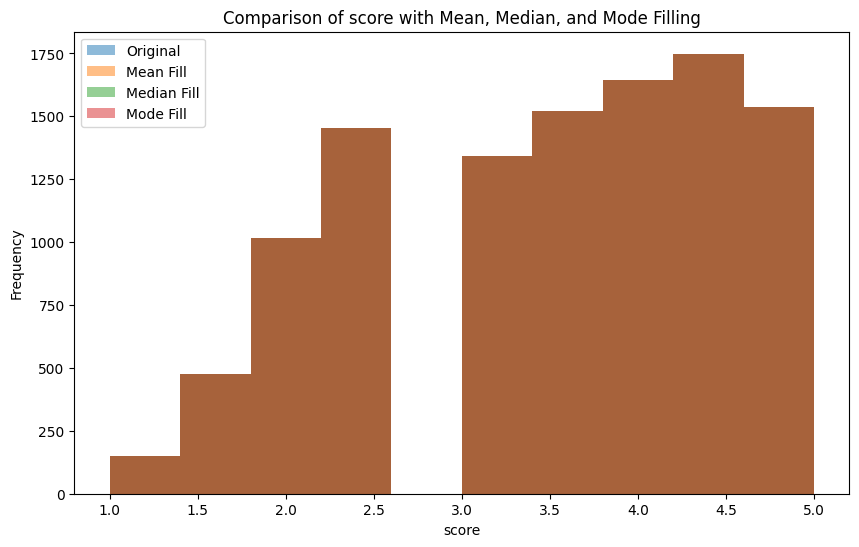

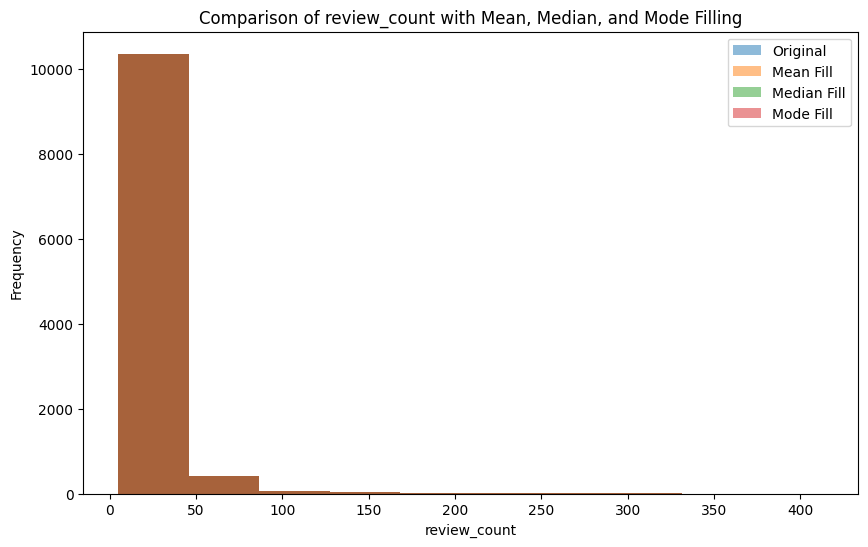

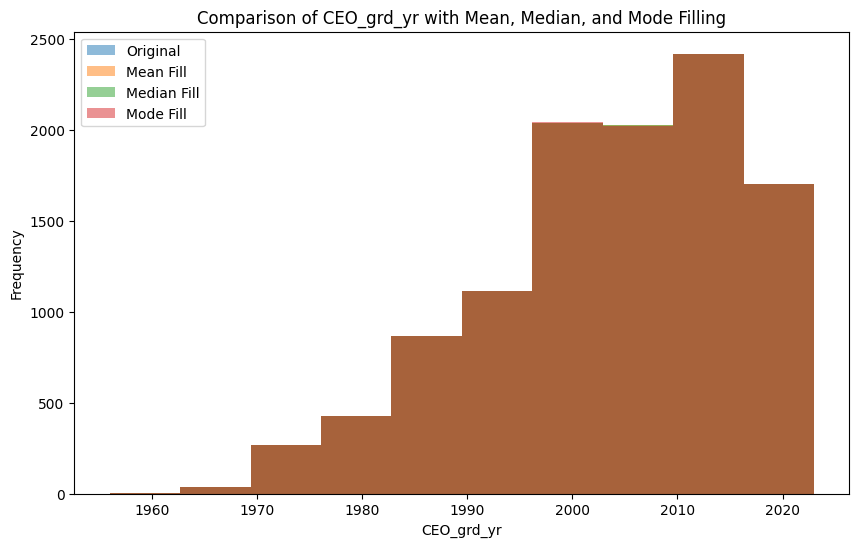

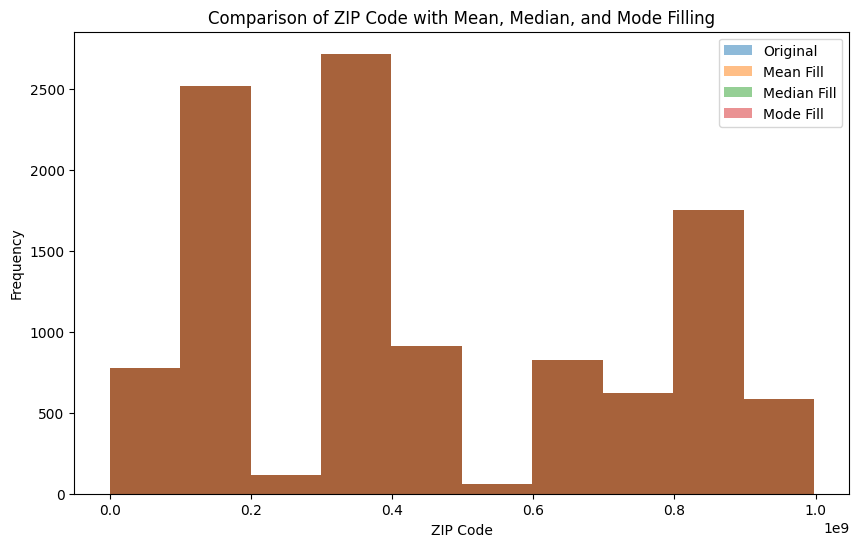

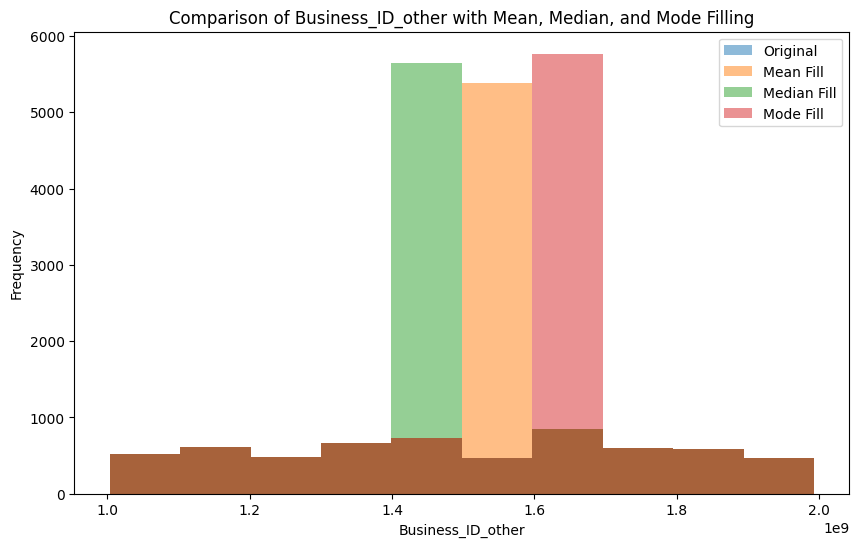

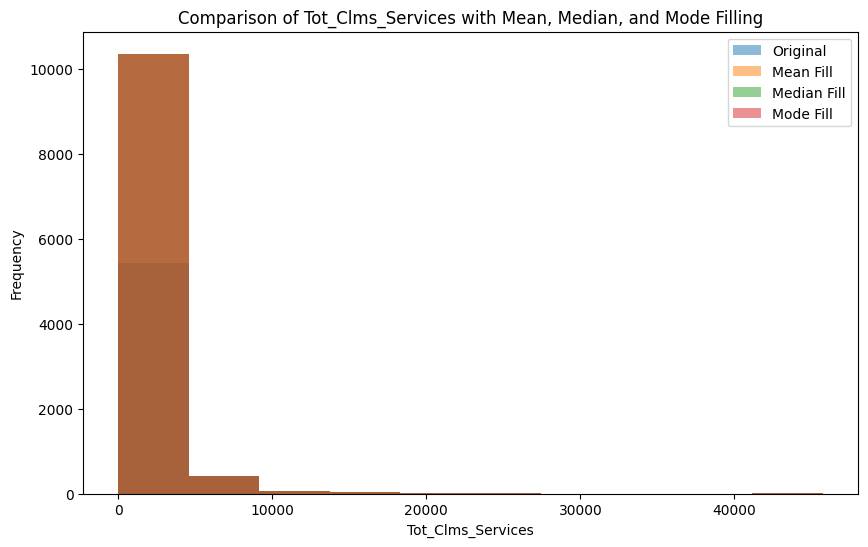

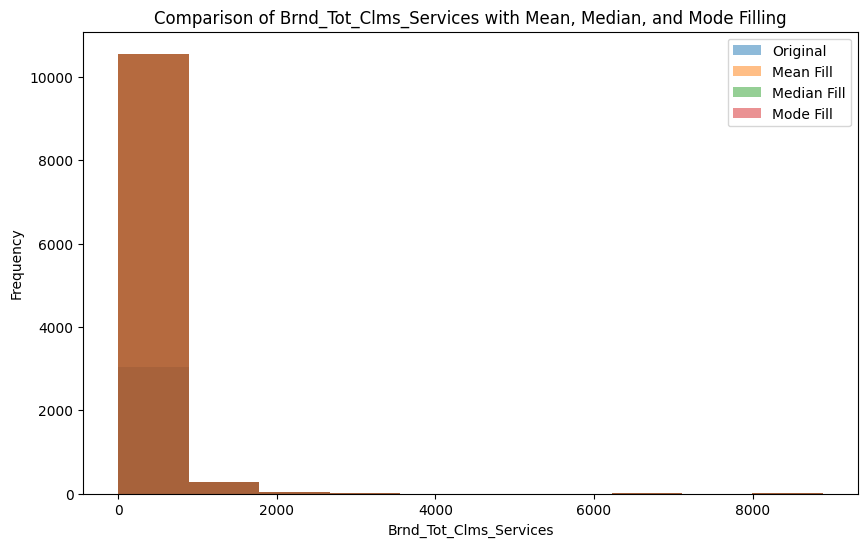

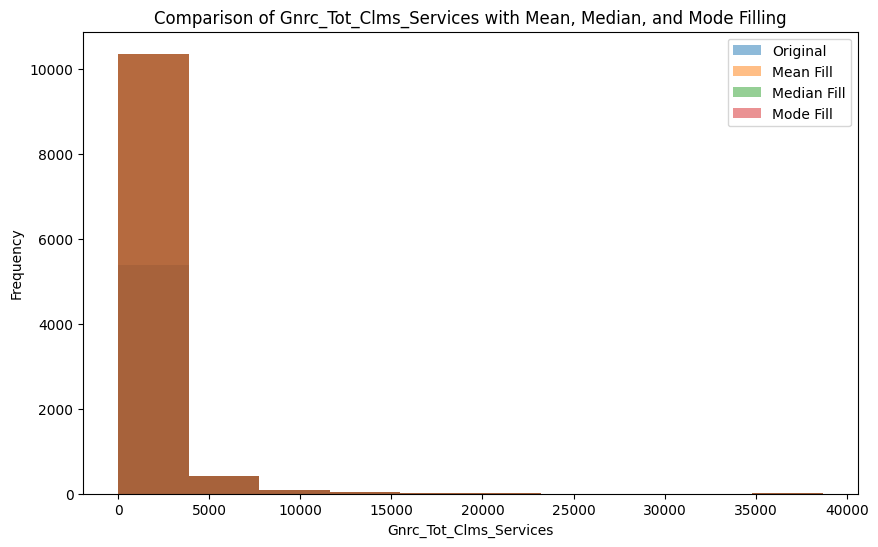

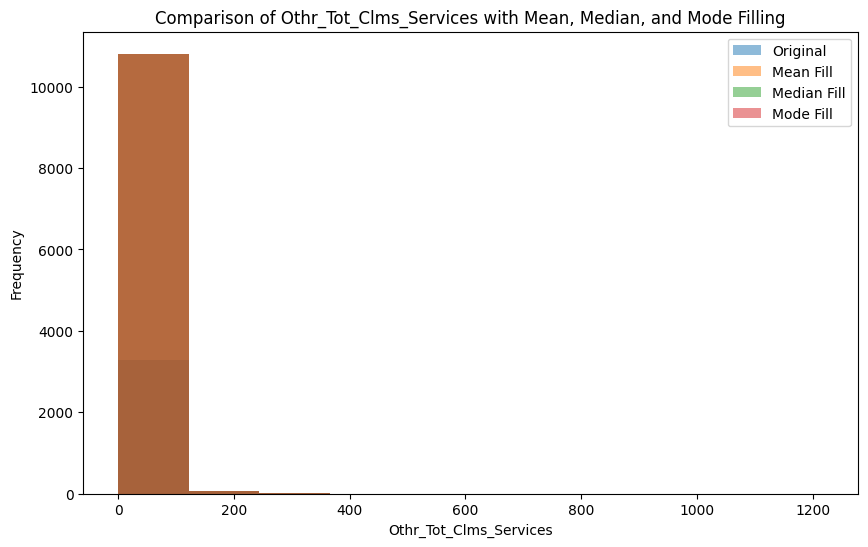

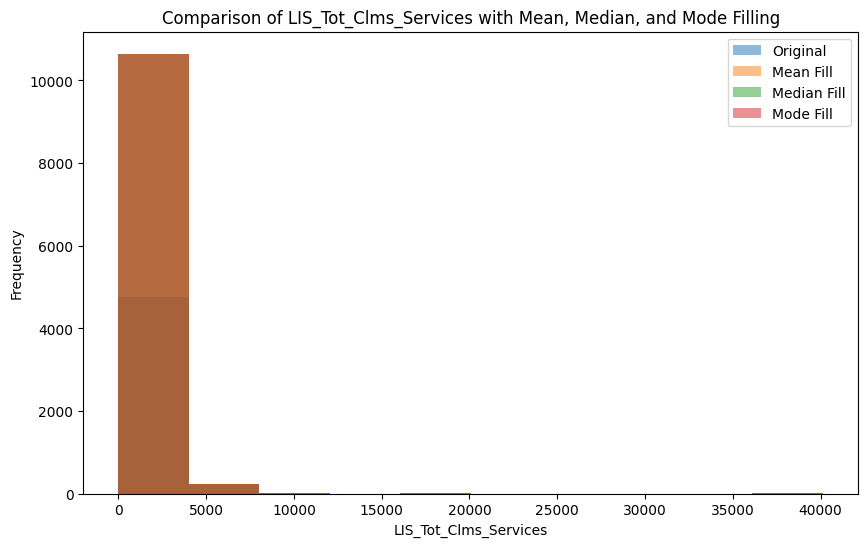

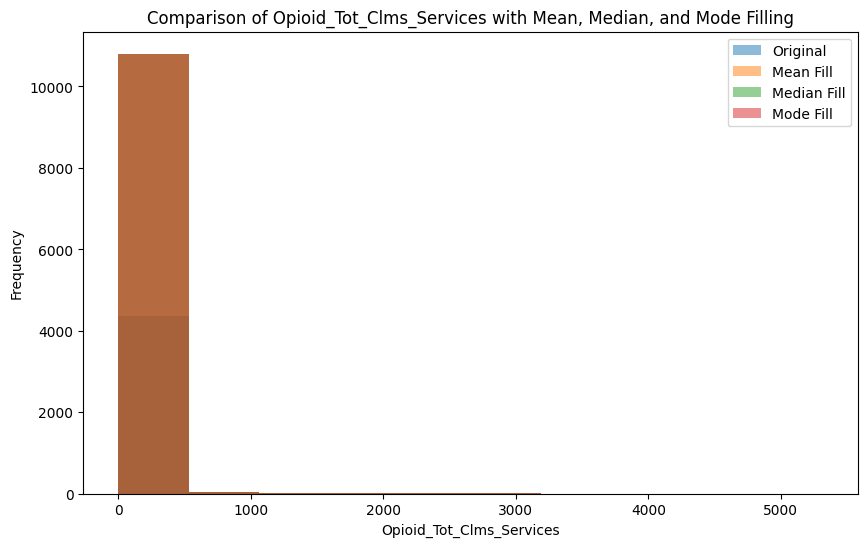

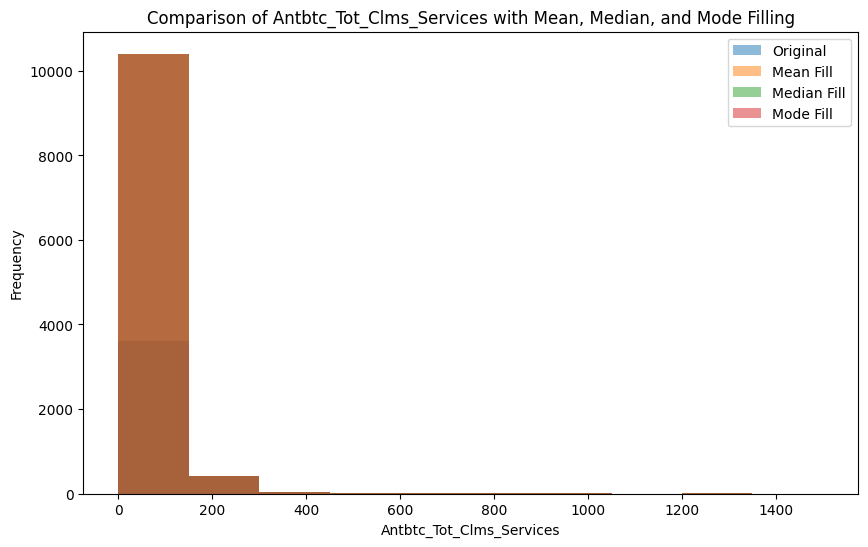

In [52]:
# Select only numerical columns for comparison
numerical_columns = data.select_dtypes(include=['number']).columns

# Create comparison graphs for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], alpha=0.5, label='Original')
    plt.hist(filled_data_mean[column], alpha=0.5, label='Mean Fill')
    plt.hist(filled_data_median[column], alpha=0.5, label='Median Fill')
    plt.hist(filled_data_mode[column], alpha=0.5, label='Mode Fill')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Comparison of {column} with Mean, Median, and Mode Filling')
    plt.legend()
    plt.show()

In [36]:
data.columns

Index(['state', 'postal_code', 'score', 'review_count', 'Gender',
       'CEO_sch_cat', 'CEO_grd_yr', 'field_cat', 'ZIP Code',
       'Business_ID_other', 'Tot_Clms_Services', 'Brnd_Tot_Clms_Services',
       'Gnrc_Tot_Clms_Services', 'Othr_Tot_Clms_Services',
       'LIS_Tot_Clms_Services', 'Opioid_Tot_Clms_Services',
       'Antbtc_Tot_Clms_Services'],
      dtype='object')

# Categorical Variable Handling:


In [34]:
data['Gender'] = data['Gender'].astype('category')
data['CEO_sch_cat'] = data['CEO_sch_cat'].astype('category')

# Graphical Analysis:


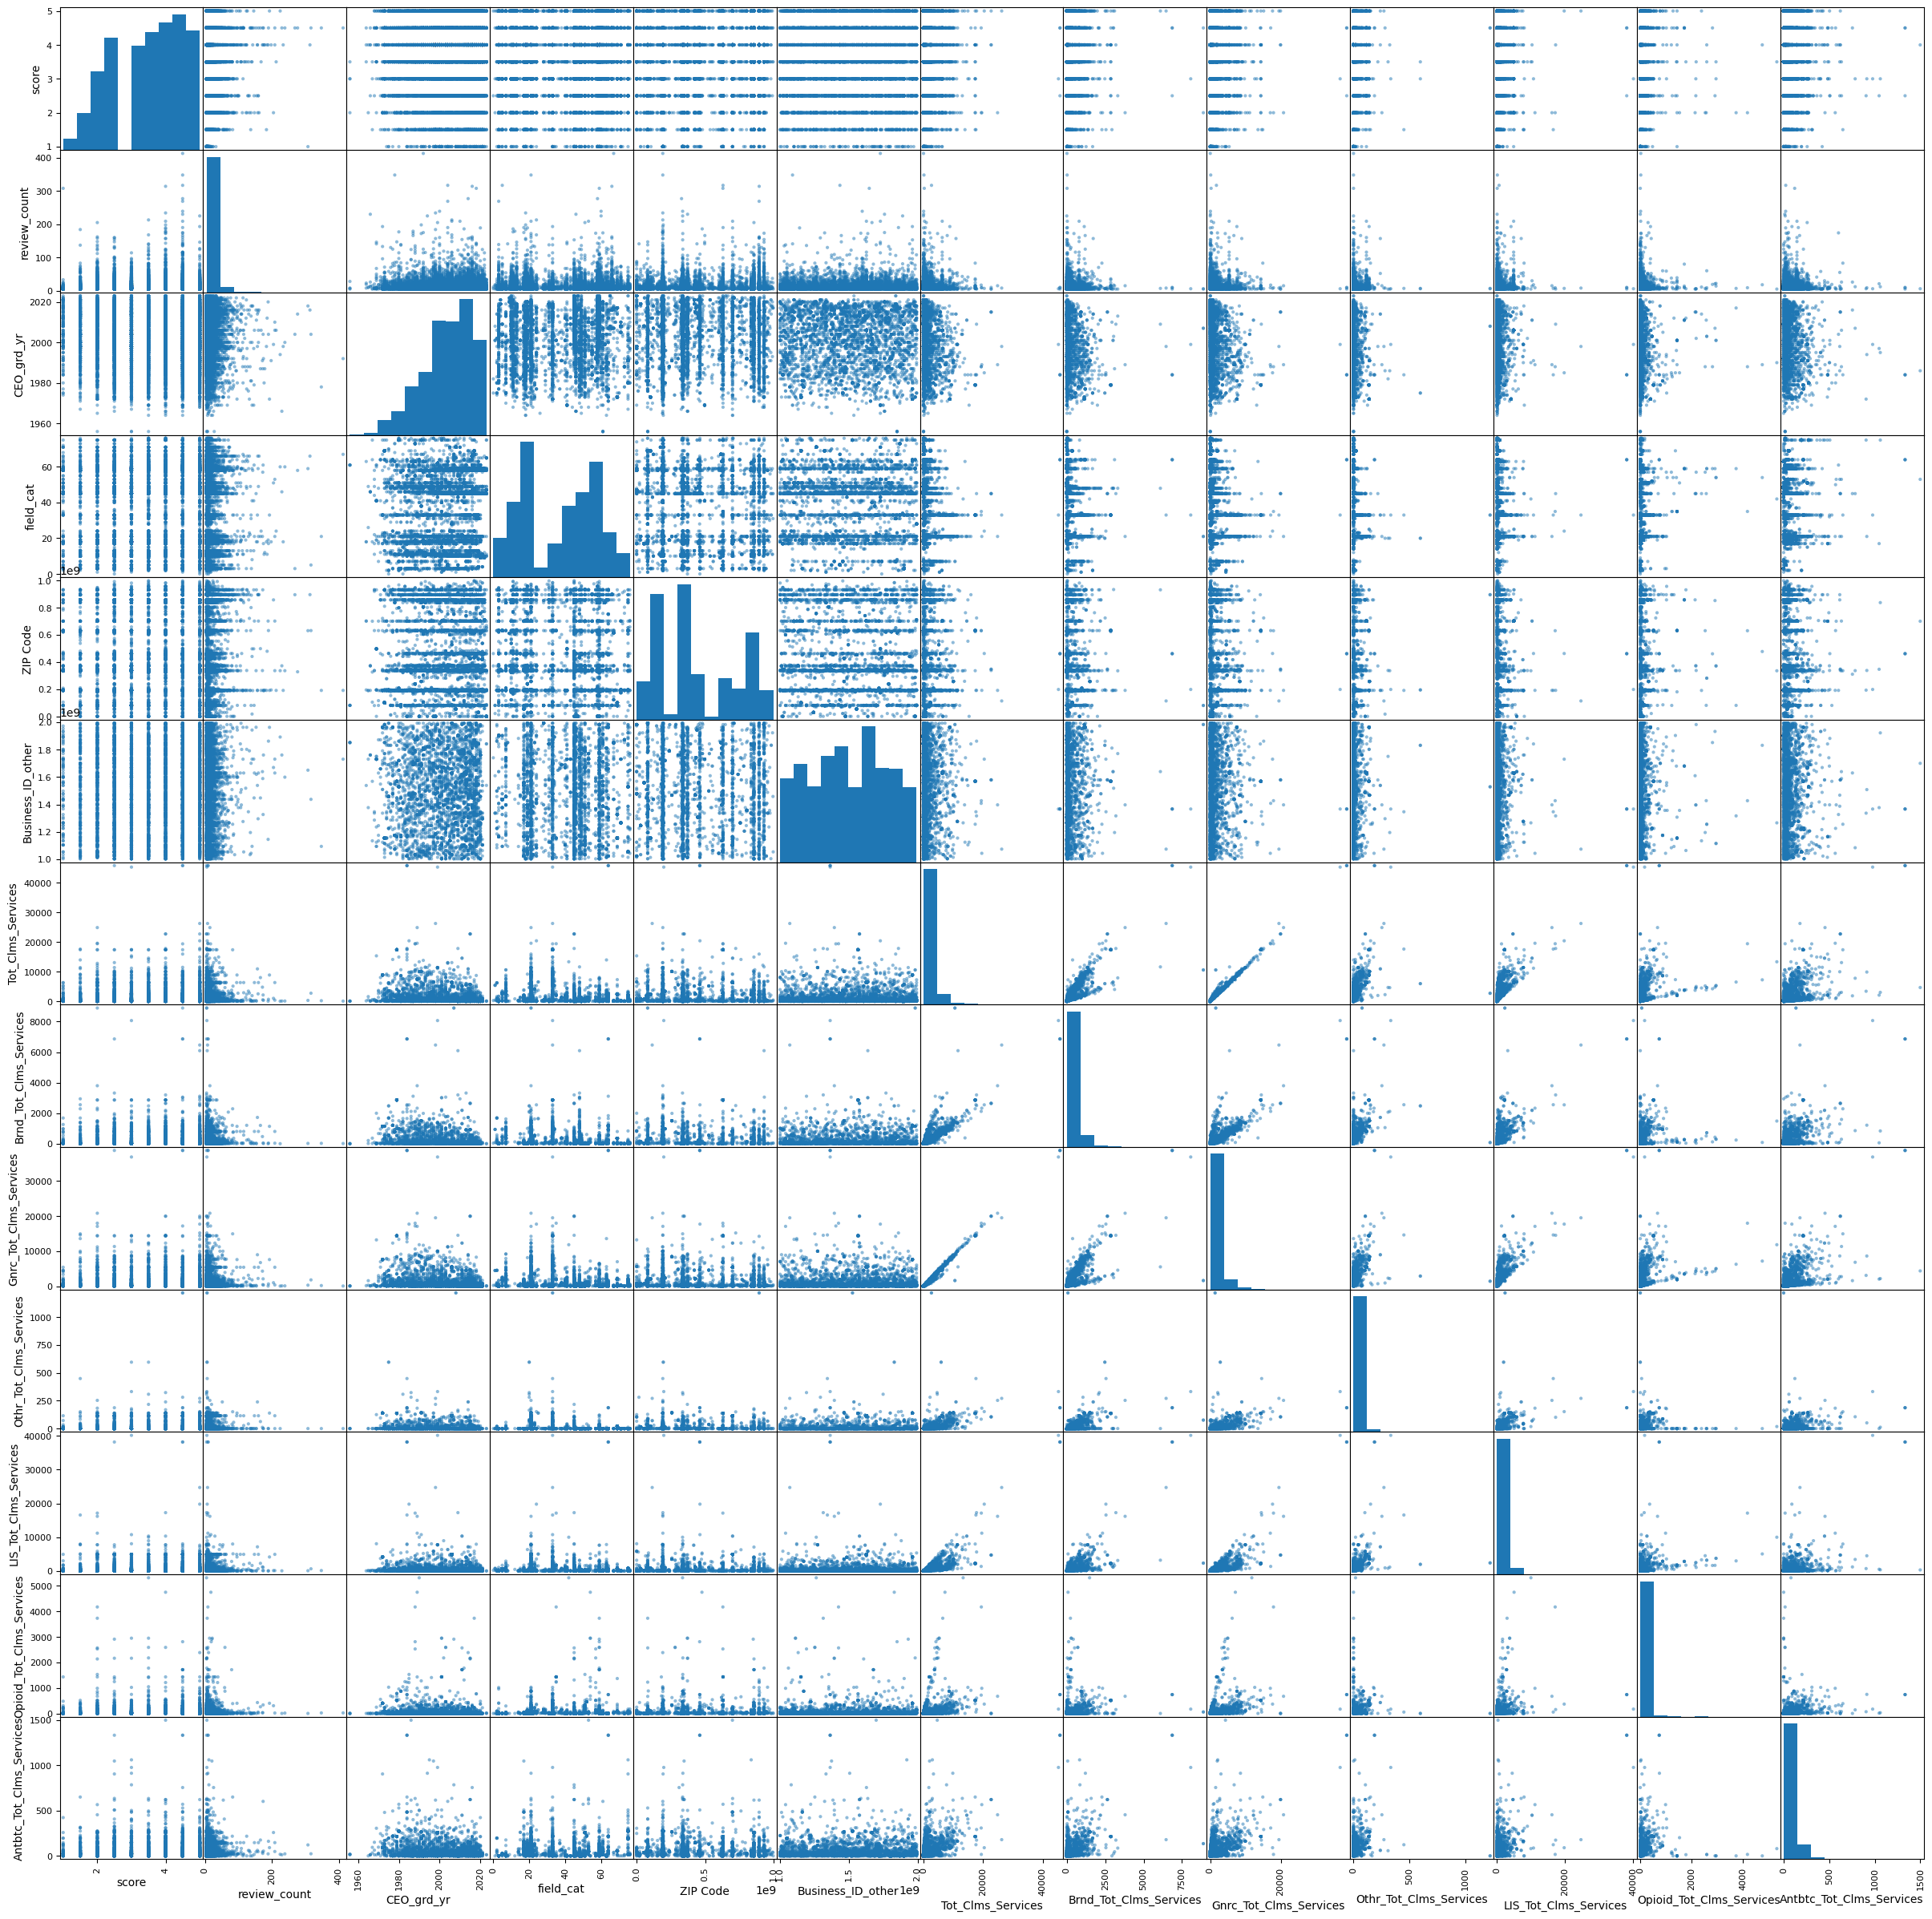

In [40]:
selected_fields = data[['state', 'postal_code', 'score', 'review_count', 'Gender',
       'CEO_sch_cat', 'CEO_grd_yr', 'field_cat', 'ZIP Code',
       'Business_ID_other', 'Tot_Clms_Services', 'Brnd_Tot_Clms_Services',
       'Gnrc_Tot_Clms_Services', 'Othr_Tot_Clms_Services',
       'LIS_Tot_Clms_Services', 'Opioid_Tot_Clms_Services',
       'Antbtc_Tot_Clms_Services']]
pd.plotting.scatter_matrix(selected_fields, figsize=(30, 30))
plt.show()

# Define categorical columns for one-hot encoding


In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Select relevant columns for modeling (excluding 'field_cat', 'Gender', and 'state')
numerical_cols = ['score', 'review_count', 'CEO_grd_yr', 'Tot_Clms_Services', 'Brnd_Tot_Clms_Services']
selected_data = filled_data_median[numerical_cols]

# Fill missing values using mean
selected_data = selected_data.fillna(selected_data.mean())

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
selected_data['CEO_sch_cat_encoded'] = label_encoder.fit_transform(filled_data_median['CEO_sch_cat'])



# Statistical Learning Models:


In [82]:
X = selected_data.drop('score', axis=1)
y = selected_data['score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred = lasso.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 1.0602185946334952


# Developing Generalized Additive Models (GAM) and One Statistical Model:

In [87]:
from pygam import GAM, s, f
from sklearn.tree import DecisionTreeRegressor

# Example for GAM
gam = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5)).fit(selected_data, data['score'])
gam.summary()



GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     66.4904
Link Function:                     IdentityLink Log Likelihood:                    -2.4823213375161675e+23
Number of Samples:                        10891 AIC:                                 4.964642675032335e+23
                                                AICc:                                4.964642675032335e+23
                                                GCV:                                                   0.0
                                                Scale:                                                 0.0
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_12108\3630247810.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


# Plotting Partial Residuals and Interpretation:

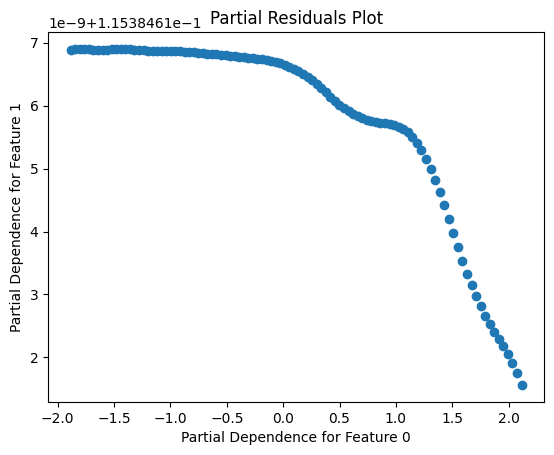

In [88]:
plt.figure()
plt.scatter(gam.partial_dependence(term=0), gam.partial_dependence(term=1))
plt.xlabel('Partial Dependence for Feature 0')
plt.ylabel('Partial Dependence for Feature 1')
plt.title('Partial Residuals Plot')
plt.show()

# Cross-Validation and Hyperparameter Tuning:

In [89]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Lasso regression
params = {'alpha': [0.1, 0.5, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print('Best Alpha:', best_alpha)


Best Alpha: 0.1


# Converting Response Variable for Classification Models


In [90]:
threshold = 50
selected_data['score_binary'] = (selected_data['score'] >= threshold).astype(int)
selected_data

,score,review_count,CEO_grd_yr,Tot_Clms_Services,Brnd_Tot_Clms_Services,CEO_sch_cat_encoded,score_binary
0,5.0,7,1997.0,337.0,79.0,108,0
1,5.0,10,2017.0,971.0,138.0,108,0
2,4.0,13,1986.0,337.0,79.0,108,0
3,2.5,8,1980.0,1988.0,79.0,138,0
4,3.5,17,2014.0,847.0,73.0,116,0
...,...,...,...,...,...,...,...
10886,4.5,15,1997.0,141.0,81.0,128,0
10887,2.5,7,2018.0,297.0,18.0,108,0
10888,3.5,20,2015.0,337.0,79.0,108,0
10889,4.5,7,2004.0,2723.0,79.0,126,0


In [92]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Evaluate GAM Model Performance


In [98]:
import pygam
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def adjusted_r_squared(model, y_true, y_pred):

  try:
    r2 = model.score(y_true, y_pred)  # Try using model's score method
  except AttributeError:
    r2 = r2_score(y_true, y_pred)  # Calculate R-squared manually
  n = len(y_true)
  p = len(model.feature_names_)  # Get number of features from model
  adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
  return adjusted_r2

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the GAM model
gam = pygam.GAM().fit(X_train, y_train)

# Calculate adjusted R-squared
adjusted_r2_gam = adjusted_r_squared(gam, y_test, gam.predict(X_test))

# Calculate AIC and BIC
aic_gam = gam.aic(X_test, y_test)
bic_gam = gam.bic(X_test, y_test)

# Calculate RMSE and MAE
y_pred_gam = gam.predict(X_test)
rmse_gam = mean_squared_error(y_test, y_pred_gam, squared=False)
mae_gam = mean_absolute_error(y_test, y_pred_gam)

# Print GAM Model Evaluation
print("GAM Model Evaluation:")
print("Adjusted R-squared:", adjusted_r2_gam)
print("AIC:", aic_gam)
print("BIC:", bic_gam)
print("RMSE:", rmse_gam)
print("MAE:", mae_gam)


ValueError: X data must have 5 features, but found 1

In [99]:
selected_data.columns

Index(['score', 'review_count', 'CEO_grd_yr', 'Tot_Clms_Services',
       'Brnd_Tot_Clms_Services', 'CEO_sch_cat_encoded', 'score_binary'],
      dtype='object')

In [102]:
import pygam
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

def adjusted_r_squared(model, X, y_true, y_pred):
    try:
        r2 = model.score(X, y_true)  # Try using model's score method
    except AttributeError:
        r2 = r2_score(y_true, y_pred)  # Calculate R-squared manually
    n = len(y_true)
    p = X.shape[1]  # Get number of features from X
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return adjusted_r2

def evaluate_gam_model(X, y, test_size=0.2, random_state=42):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Fit the GAM model
    gam = pygam.GAM().fit(X_train, y_train)

    # Calculate adjusted R-squared
    adjusted_r2_gam = adjusted_r_squared(gam, X_test, y_test, gam.predict(X_test))

    # Calculate AIC and BIC
    aic_gam = gam.statistics(X_test, y_test)['AIC']
    bic_gam = gam.statistics(X_test, y_test)['BIC']

    # Calculate RMSE and MAE
    y_pred_gam = gam.predict(X_test)
    rmse_gam = mean_squared_error(y_test, y_pred_gam, squared=False)
    mae_gam = mean_absolute_error(y_test, y_pred_gam)

    # Print GAM Model Evaluation
    print("GAM Model Evaluation:")
    print("Adjusted R-squared:", adjusted_r2_gam)
    print("AIC:", aic_gam)
    print("BIC:", bic_gam)
    print("RMSE:", rmse_gam)
    print("MAE:", mae_gam)

# Target variable (replace 'score' if it's different)
target_variable = 'score'

# Use all features (replace with specific features if needed)
features = selected_data.columns.tolist()
features.remove(target_variable)  # Remove target variable from features

X = selected_data[features]  # Select features as DataFrame
y = selected_data[target_variable]  # Select target variable

evaluate_gam_model(X, y)


AttributeError: 'GAM' object has no attribute 'statistics'

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import aic, bic
import numpy as np

# 1. Evaluate GAM Model Performance
# Calculate adjusted R-squared
def adjusted_r_squared(model, X, y):
    y_pred = model.predict(X)
    ss_res = sum((y - y_pred) ** 2)
    ss_tot = sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    n = len(y)
    p = X.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return adjusted_r2

adjusted_r2_gam = adjusted_r_squared(gam, X_test, y_test)

# Calculate AIC and BIC
y_pred_gam = gam.predict(X_test)
residuals = y_test - y_pred_gam
sse = sum(residuals**2)
n = len(y_test)
p = X_test.shape[1]  # Number of predictors
# Calculate AIC
aic_gam = aic(n, sse)
# Calculate BIC
bic_gam = bic(n, sse)

# Calculate RMSE and MAE
rmse_gam = mean_squared_error(y_test, y_pred_gam, squared=False)
mae_gam = mean_absolute_error(y_test, y_pred_gam)

print("GAM Model Evaluation:")
print("Adjusted R-squared:", adjusted_r2_gam)
print("AIC:", aic_gam)
print("BIC:", bic_gam)
print("RMSE:", rmse_gam)
print("MAE:", mae_gam)


TypeError: aic() missing 1 required positional argument: 'df_modelwc'